(gof-notebook)=
# Test del Modello e Indicizzazione

In questo capitolo, focalizziamo l'attenzione sulle due principali categorie di statistiche per la valutazione dell'adattamento globale nei modelli SEM: le statistiche di test del modello e gli indici di adattamento approssimativo. Queste due categorie corrispondono, rispettivamente, al test del modello e all'indicizzazione dell'adattamento del modello, come delineato da Hayduk nel 2014.

1. **Statistiche di Test del Modello:** Queste statistiche si basano su una decisione binaria, ovvero se respingere o mantenere le ipotesi nulle relative al modello. Tale decisione è determinata dai valori p derivati dai test di significatività. In questo contesto, l'obiettivo è stabilire se il modello, nella sua interezza, si adatta ai dati osservati.

2. **Indici di Adattamento Approssimativo:** A differenza delle statistiche di test del modello, gli indici di adattamento approssimativo si basano su misure continue che valutano quanto il modello corrisponda ai dati. Questo approccio è simile alla stima della dimensione dell'effetto quantitativo piuttosto che al test di significatività dicotomico. Questi indici forniscono una valutazione più sfumata dell'adattamento del modello, andando oltre il semplice rifiuto o accettazione dell'ipotesi nulla.

Un aspetto critico da considerare è che, nonostante le statistiche di adattamento globale in entrambe le categorie misurino la corrispondenza media o generale tra modello e dati, esse possono non rilevare un cattivo adattamento locale. Questo si riferisce a specifiche coppie di variabili osservate per le quali il modello non spiega adeguatamente le loro associazioni osservate nel campione. È importante riconoscere che i modelli con un cattivo adattamento locale non dovrebbero essere mantenuti, indipendentemente dal loro adattamento globale.

La valutazione complessiva del modello SEM segue una sequenza metodica che include la specificazione del modello, la stima dei parametri, l'esame dell'adattamento del modello e dei parametri, e la possibile modifica del modello. Questo processo iterativo prosegue fino all'identificazione di un modello considerato accettabile.

In aggiunta, questo capitolo si propone di esplorare due metodi fondamentali per la pianificazione della dimensione del campione in SEM: l'analisi della potenza e l'accuratezza nella stima dei parametri, anche nota come precisione nella pianificazione. Questi approcci sono essenziali per garantire che la ricerca sia adeguatamente dimensionata e che i parametri del modello siano stimati con la massima precisione possibile. La valutazione degli indici di bontà dell'adattamento, largamente utilizzati nella letteratura, sarà un focus chiave in questo contesto, fornendo una panoramica completa degli strumenti a disposizione dei ricercatori per valutare l'efficacia dei loro modelli SEM.

In [2]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("lavaanExtra")
    library("lavaanPlot")
    library("psych")
    library("dplyr") 
    library("tidyr")
    library("knitr")
    library("mvnormalTest")
    library("semPlot")
    library("DiagrammeRsvg")
    library("rsvg")
    library("effectsize")
})

set.seed(42)

## Valutazione della Bontà di Adattamento nel Modello SEM

Nel contesto dei modelli SEM (Structural Equation Modeling), la valutazione dell'adattamento del modello si basa sul confronto tra la matrice di varianze e covarianze stimata dal modello, $\Sigma(\hat{\theta})$, e la matrice di covarianza campionaria, $S$. Il nostro obiettivo è verificare se la discrepanza tra queste due matrici indica possibili inadeguatezze nel modello proposto. Ecco alcuni aspetti rilevanti da considerare:

- **Modelli Saturi vs Modelli Ristretti**: Un modello saturo include un numero di parametri in $\theta$ pari al numero di elementi distinti nella matrice di covarianza. In contrasto, un modello ristretto ha meno parametri rispetto al numero degli elementi distinti nella matrice di covarianza. La differenza tra questi due numeri corrisponde ai gradi di libertà del modello. Per esempio, in un modello saturo, se il numero dei parametri in $\theta$ e il numero degli elementi distinti nella matrice di covarianza sono entrambi 3, allora il modello ha zero gradi di libertà.

- **Perfetto Adattamento dei Modelli Saturi**: In un modello saturo, $\Sigma(\hat{\theta})$ coincide sempre con $S$, poiché il modello ha abbastanza parametri per adattarsi perfettamente ai dati del campione. Tuttavia, ciò non implica necessariamente che il modello rappresenti fedelmente la popolazione più ampia. Le stime dei parametri in un modello saturo possono fornire informazioni sui pattern di relazione tra le variabili nel campione specifico, ma è cruciale interpretarle con cautela.

- **Stima e Identificabilità del Modello**: Generalmente, la stima dei parametri non si basa sul semplice risolvere un sistema di equazioni matematiche. Invece, si utilizza una funzione di adattamento o discrepanza tra $\Sigma(\theta)$ e $S$, cercando il valore ottimale di $\hat{\theta}$ attraverso tecniche di ottimizzazione numerica. Un modello SEM deve essere identificabile, il che significa che deve essere possibile stimare univocamente i parametri del modello. L'identificabilità implica che il numero di unità di informazione, come elementi nella matrice di covarianza, sia maggiore o uguale al numero di parametri da stimare.

### Gradi di Libertà e Identificabilità del Modello

I gradi di libertà (dof) in un modello SEM sono calcolati come:

$$
dof = \# (\text{unità di informazione}) - \# (\text{parametri da stimare})
$$

Per una matrice di covarianza di ordine $ p $, il numero di unità di informazione è $ \frac{p (p+1)}{2} $. Per garantire l'identificabilità, è necessario soddisfare alcune condizioni:

1. In tutti i modelli, l'unità di misura delle variabili latenti deve essere specificata.
2. Il numero di unità di informazione deve essere uguale o superiore al numero di parametri da stimare.
3. In modelli ad un fattore, è richiesto un minimo di tre indicatori per una soluzione "appena identificata".
4. In modelli a più fattori, si raccomanda un minimo di tre indicatori per ogni variabile latente.

Un modello è:
- *Non identificato* se $ dof < 0 $.
- *Appena identificato* o "saturo" se $ dof = 0 $.
- *Sovra-identificato* se $ dof > 0 $.

È importante notare che un'analisi fattoriale con solo due indicatori per un fattore non è possibile, poiché ci sono meno unità di informazione rispetto ai parametri da stimare. Un modello con tre indicatori e un fattore è "appena identificato", senza gradi di libertà per valutare la bontà dell'adattamento. Per modelli ad un solo fattore comune latente, è quindi necessario disporre di almeno quattro indicatori.

### Funzione di Discrepanza e Valutazione della Bontà di Adattamento

La funzione di discrepanza tra $|S|$ e $|\Sigma(\theta)|$ basata sulla massima verosimiglianza (ML) deriva dalla verosimiglianza normale multivariata dei dati ed è formulata nel seguente modo:

$$
FML(S, \Sigma(\theta)) = \log|\Sigma(\theta)| - \log|S| + \text{traccia}(S\Sigma(\theta)^{-1}) - p
$$

dove $|S|$ e $|\Sigma(\theta)|$ sono i determinanti di $S$ e $\Sigma(\theta)$ rispettivamente, e $p$ è la dimensione di $S$ o $\Sigma(\theta)$. In questo contesto, $\log|\Sigma(\theta)|$ rappresenta il logaritmo del determinante della matrice di covarianza stimata dal modello, mentre $\log|S|$ è il logaritmo del determinante della matrice di covarianza campionaria. La "traccia" ($S\Sigma(\theta)^{-1}$) è la somma degli elementi della diagonale principale del prodotto di $S$ per l'inverso di $\Sigma(\theta)$. Questa funzione di discrepanza misura la differenza tra le covarianze osservate e quelle stimate dal modello, prendendo in considerazione sia le dimensioni delle matrici sia la loro forma.

La funzione di discrepanza basata sulla massima verosimiglianza (ML), come quella descritta dalla formula precedente, si distribuisce asintoticamente come una variabile casuale seguente una distribuzione chi quadrato (χ²) sotto l'ipotesi nulla che il modello specificato si adatti perfettamente ai dati.

La distribuzione chi quadrato è utilizzata per testare l'adattamento del modello nei contesti di modellazione di equazioni strutturali (SEM) e di analisi fattoriale. Il valore calcolato dalla funzione di discrepanza viene confrontato con un valore critico dalla distribuzione chi quadrato. Il numero di gradi di libertà per la distribuzione chi quadrato è tipicamente calcolato come la differenza tra il numero di stime indipendenti nella matrice di covarianza e il numero di parametri stimati nel modello.

Se il valore calcolato dalla funzione di discrepanza è inferiore al valore critico della distribuzione chi quadrato per i dati gradi di libertà, allora non si rifiuta l'ipotesi nulla e si conclude che il modello ha un buon adattamento. Se invece è maggiore, si rifiuta l'ipotesi nulla, indicando che il modello non si adatta bene ai dati.

In pratica, questo test è utilizzato per valutare la bontà di adattamento del modello ai dati osservati e per decidere se il modello specificato è adeguato o se sono necessarie ulteriori modifiche.

## Test $\chi^2$

Il test del chi quadrato ($\chi^2$) è utilizzato per determinare quanto bene un modello teorico si adatta ai dati osservati. La formula per calcolare la statistica $\chi^2$ è:

$$
\chi^2 = N \times F_{\text{min}},
$$

dove:
- $ N $ rappresenta la dimensione del campione.
- $ F_{\text{min}} $ è il valore minimo della funzione di discrepanza.

La funzione di discrepanza, $ F $, è una misura di quanto le covarianze (o le varianze) osservate nei dati differiscano da quelle previste dal modello. Durante il processo di stima dei parametri del modello, questa funzione viene minimizzata. Il valore di $ F $ al suo minimo, $ F_{\text{min}} $, rappresenta la discrepanza minima tra i dati osservati e quelli previsti dal modello.

Nell'ambito dell'analisi strutturale di covarianza, il valore di $ F_{\text{min}} $ è tipicamente ottenuto attraverso la stima di massima verosimiglianza (Maximum Likelihood, ML). Tuttavia, ci sono due modi comuni per calcolare $ \chi^2 $, che possono variare a seconda del software utilizzato:
1. $ \chi^2 = (N - 1) \times F_{\text{min}} $
2. $ \chi^2 = N \times F_{\text{min}} $

La scelta tra $ N $ e $ N-1 $ dipende da come il software gestisce la normalizzazione e l'adattamento delle strutture di covarianza.

### Interpretazione del Test del $\chi^2$

- **Ipotesi Nulla $ H_0 $**: Il modello si adatta bene ai dati. Ciò significa che non c'è una differenza significativa tra le covarianze osservate e quelle previste dal modello.
- **Valore p**: Un valore p basso (ad esempio, minore di 0,05) suggerisce che dovremmo rifiutare l'ipotesi nulla, indicando che il modello non si adatta bene ai dati.

### Limitazioni

La statistica $\chi^2$ è influenzata dalla dimensione del campione. Con campioni più grandi, anche piccole discrepanze tra il modello e i dati possono risultare in un valore di $\chi^2$ elevato, portando a rifiutare erroneamente un buon modello. Inoltre, il test del $\chi^2$
- Non indica la direzione o la natura della discrepanza tra modello e dati.
- Non sempre adatto per modelli complessi o in situazioni in cui le ipotesi di base (come la normalità multivariata) non sono soddisfatte.

Per queste ragioni, il test del $\chi^2$ è spesso accompagnato da altri indici di adattamento del modello, come l'indice di adattamento comparativo (CFI) o l'indice di adattamento radice quadrata media dell'errore approssimativo (RMSEA), per ottenere una valutazione più completa della bontà di adattamento del modello ai dati.

In conclusione, il test del $\chi^2$ è utile ma ha limitazioni e deve essere interpretato con cautela, considerando la dimensione del campione e altri fattori influenti. Nonostante i suoi limiti, la statistica $\chi^2$ viene comunque utilizzata per altri scopi, come il confronto di modelli nidificati, il calcolo di altri indici di adattamento (ad es. l'indice di Tucker–Lewis) e il calcolo del rapporto tra $\chi^2$ e gradi di libertà. 

### Test di rapporto di verosimiglianza

Il test del $\chi^2$ può essere impiegato come un test di rapporto di verosimiglianza per confrontare due modelli nidificati. In questo contesto, "nidificati" significa che uno dei modelli (considerato il modello più semplice o ristretto) è un caso speciale dell'altro (il modello più complesso), con meno parametri liberi da stimare. Questo tipo di test è particolarmente utile per valutare se l'aggiunta di parametri supplementari (rendendo il modello più complesso) migliora significativamente l'adattamento del modello ai dati.

Il processo di confronto tra i due modelli avviene nel seguente modo:
1. Si stima il modello più semplice e si calcola il suo valore di $\chi^2$.
2. Si stima il modello più complesso e si calcola il suo valore di $\chi^2$.
3. Si confrontano i due valori di $\chi^2$ per determinare se l'aggiunta di parametri aggiuntivi giustifica un miglioramento dell'adattamento del modello ai dati, dati i gradi di libertà aggiuntivi.

Se il valore p associato al $\chi^2$ del modello più complesso è significativamente più basso rispetto a quello del modello più semplice, questo suggerisce che l'aggiunta dei parametri fornisce un miglioramento significativo nell'adattamento del modello. Al contrario, se non vi è un miglioramento significativo, si può concludere che il modello più semplice è preferibile in termini di parsimonia e adattamento.


## Chi Quadrato Normalizzato (NC)

Il Chi Quadrato Normalizzato (NC) emerge come un tentativo di attenuare l'effetto della dimensione del campione sulla statistica del chi quadrato del modello ($\chi^2$). Questa pratica, adottata da alcuni ricercatori, consiste nel dividere $\chi^2$ per il numero dei gradi di libertà del modello (dfM), risultando nella formula $\frac{\chi_{ML}}{dfM}$. Nonostante l'intento di mitigare l'impatto della dimensione del campione (N), l'impiego di NC presenta limitazioni sostanziali:

1. **Influenza di N sui Modelli Erronei**: La statistica $\chi_{ML}$ è sensibile a N esclusivamente per i modelli non corretti. Questo implica che l'uso di NC per modelli veritieri potrebbe essere fuorviante.
   
2. **Indipendenza di dfM da N**: I gradi di libertà del modello (dfM) non sono correlati con la dimensione del campione, rendendo la divisione di $\chi_{ML}$ per dfM arbitraria e priva di fondamento statistico.

3. **Mancanza di Linee Guida**: Non esistono criteri consolidati che definiscano i limiti "accettabili" per il valore di NC. Per esempio, non è chiaro se un valore massimo di NC debba essere inferiore a 2.0, 3.0, o altro.

In conclusione, data la mancanza di una solida giustificazione statistica o logica, {cite:r}`kline2023principles` sconsiglia l'utilizzo del Chi Quadrato Normalizzato come strumento di valutazione della bontà di adattamento del modello.

## Chi Quadrato Scalato e Errori Standard Robusti per Distribuzioni Non Normali

Nell'ambito dell'analisi di massima verosimiglianza (ML), sia l'approccio ML standard che quello robusto forniscono le stesse stime dei parametri. Tuttavia, il ML robusto differisce nell'introduzione di chi quadrati scalati ($\chi^2$ scalati) e di errori standard robusti, i quali sono adattati per controbilanciare gli effetti della non normalità dei dati. 

Un metodo pionieristico sviluppato da Satorra e Bentler, che si basa sull'utilizzo di dati completi, calcola il chi quadrato scalato ($\chi_{SB}$) applicando un fattore di correzione di scala, indicato con $ c $, al valore del chi quadrato non scalato del modello ($\chi_{ML}$). Questo fattore di scala $ c $ è determinato dalla curtosi multivariata media osservata nei dati grezzi. La formula specifica per il calcolo di $\chi_{SB}$ è:

$$
\chi_{SB} = \frac{\chi_{ML}}{c}.
$$

Questa formula evidenzia come il chi quadrato scalato di Satorra-Bentler modifica il chi quadrato tradizionale per tenere conto della curtosi nei dati, fornendo così una misura più affidabile della bontà di adattamento del modello in presenza di distribuzioni non normali.

Quando si utilizza il Chi Quadrato Scalato di Satorra-Bentler ($\chi_{SB}$), è importante comprendere come esso si comporti in campioni casuali. Le distribuzioni di $\chi_{SB}$ tendono ad avvicinarsi alle distribuzioni chi quadrato centrali, ma con una caratteristica fondamentale: le loro medie sono asintoticamente corrette. Questo significa che, su larga scala, $\chi_{SB}$ fornisce una stima media accurata della discrepanza tra i dati osservati e quelli previsti dal modello, correggendo per eventuali distorsioni causate dalla non normalità dei dati.

Un altro tipo di chi quadrato, sviluppato da Asparouhov e Muthén, non si basa sul $\chi_{ML}$ standard. Invece, nei campioni di grandi dimensioni, il loro chi quadrato scalato corrisponde alla statistica T2* di Yuan e Bentler. Questa versione del chi quadrato è particolarmente adatta per gestire dati non normali o con valori mancanti. I gradi di libertà, sia per $\chi_{SB}$ che per T2*, sono rappresentati da dfM, indicando la flessibilità del modello in termini di numero di parametri stimabili.

Al di là di questi, esistono chi quadrati che sono corretti sia per la media che per la varianza. Questi chi quadrati utilizzano fattori di scala diversi e, in genere, seguono distribuzioni chi quadrato centrali con medie e varianze che sono corrette in modo asintotico. Sebbene questi metodi richiedano maggiori risorse computazionali rispetto ai metodi che correggono solo per la media, tendono ad essere più precisi, specialmente in campioni di grandi dimensioni. Questa precisione aggiuntiva è particolarmente utile quando si affrontano set di dati complessi o di ampie dimensioni, permettendo una stima più accurata della bontà di adattamento del modello.

Per quanto riguarda il software `lavaan`, ci sono diverse opzioni per il metodo ML robusto:

1. "MLM" per dati completi, genera un chi quadrato scalato per la media di Satorra-Bentler.
2. "MLR" per dati completi o incompleti, produce un chi quadrato corretto per la media basato sulla statistica T2* di Yuan-Bentler.
3. "MLMV" per dati completi, calcola un chi quadrato scalato corretto per media e varianza.
4. "MLMVS" genera un chi quadrato corretto per media e varianza con una correzione per l'eteroschedasticità di Satterthwaite.

Nel contesto dei metodi ML robusti utilizzati nel software lavaan, la "matrice di informazione" è un concetto fondamentale che incide sul calcolo degli errori standard. La matrice di informazione, in statistica, è una matrice che contiene informazioni sulla varianza e covarianza dei parametri stimati di un modello. Viene utilizzata per calcolare gli errori standard delle stime dei parametri, che sono essenziali per testare l'ipotesi statistica e per la costruzione di intervalli di confidenza.

Nel software `lavaan`, la matrice di informazione può essere di due tipi:

1. **Matrice di Informazione Attesa**: Questa è la matrice predefinita utilizzata da lavaan per calcolare gli errori standard nei metodi ML robusti. La matrice di informazione attesa si basa sulle aspettative teoriche della varianza e covarianza dei parametri stimati, derivanti dal modello e dall'insieme dei dati.

2. **Matrice di Informazione Osservata**: Quando si hanno dati mancanti, lavaan passa all'utilizzo della matrice di informazione osservata. Questa matrice utilizza i dati effettivamente osservati per calcolare la varianza e la covarianza dei parametri stimati. Essa può fornire stime più accurate degli errori standard in presenza di dati mancanti.

Gli utenti di `lavaan` hanno la possibilità di specificare se utilizzare la matrice di informazione attesa anche in presenza di dati incompleti, in base alle esigenze specifiche della loro analisi. 

È importante per i ricercatori utilizzare questi strumenti in modo etico e metodologicamente corretto. Evitare di selezionare in modo opportunistico le combinazioni di chi quadrati scalati e errori standard robusti che sembrano meglio supportare le ipotesi, e dichiarare chiaramente qualsiasi variabilità nei risultati dovuta alla scelta del metodo di calcolo, è cruciale per mantenere l'integrità e l'affidabilità della ricerca.

## Indicizzazione dell'Adattamento del Modello

L'indicizzazione dell'adattamento del modello si basa sull'uso di indici di adattamento approssimati, i quali si differenziano dai test di significatività tradizionali. Invece di fornire una decisione dicotomica, come il rifiuto o l'accettazione di un'ipotesi nulla, questi indici offrono una misura continua di quanto bene un modello si adatta ai dati osservati. Non essendoci una separazione netta tra i limiti dell'errore di campionamento, gli indici di adattamento forniscono una valutazione più sfumata e graduale della bontà di adattamento.

Questi indici possono essere classificati in due categorie principali:
1. **Statistiche di Cattivo Adattamento**: In questa categoria, valori più elevati indicano un peggior adattamento del modello ai dati. Un esempio tipico di questa categoria è il chi quadrato del modello, dove valori più alti suggeriscono una maggiore discrepanza tra il modello e i dati.

2. **Statistiche di Buon Adattamento**: Al contrario, per gli indici in questa categoria, valori più alti segnalano un migliore adattamento del modello ai dati. Molti di questi indici sono normalizzati in modo che il loro intervallo varii da 0 a 1.0, dove 1.0 rappresenta l'adattamento ottimale del modello.

A differenza del test del chi quadrato, che si basa su un framework teorico ben definito, l'interpretazione e l'applicazione degli indici di adattamento approssimati non sono guidate da un unico insieme di principi teorici consolidati. Questa situazione fa sì che la valutazione dell'adattamento del modello si allinei maggiormente a ciò che Little (2013) ha descritto come "scuola di modellazione". Questo approccio contempla l'analisi di modelli statistici complessi in un contesto in cui le regole decisionali sono meno rigide e più soggette a interpretazione. 

La natura flessibile di questo approccio rispecchia la varietà e la complessità dei modelli statistici, che devono essere personalizzati per rispondere a specifiche domande di ricerca. Questa flessibilità, tuttavia, porta con sé una certa ambiguità nelle regole di valutazione dei modelli statistici. Pur offrendo la possibilità di adattare l'analisi alle particolarità di ogni studio, questa mancanza di rigore teorico uniforme può talvolta non tradursi in pratiche ottimali di modellazione. 

La questione filosofica relativa all'adattamento esatto dei modelli statistici solleva dubbi sull'idea di perfezione come standard per questi modelli. In effetti, è ampiamente riconosciuto che tutti i modelli statistici sono in qualche misura imperfetti; sono piuttosto strumenti di approssimazione che aiutano i ricercatori a organizzare e interpretare le loro osservazioni sui fenomeni di interesse. Un modello troppo semplificato, che non cattura la complessità del fenomeno, può essere inadeguato e quindi rifiutato. Allo stesso tempo, un modello eccessivamente complesso, che cerca di replicare fedelmente il fenomeno, può risultare di scarsa utilità scientifica a causa della sua complessità eccessiva.

George Box, nel suo influente lavoro del 1976, avanzò l'idea che nessun modello statistico potesse essere considerato perfettamente "corretto". Questa visione nasce dalla consapevolezza che tutti i modelli hanno una certa dose di imperfezione intrinseca. Box suggeriva che lo scopo principale di uno scienziato dovrebbe essere la ricerca di una "descrizione economica" dei fenomeni naturali, cercando cioè di formulare modelli che siano semplici, ma al contempo efficaci, nella rappresentazione della realtà. Egli criticava la tendenza a sovraelaborare o sovraparametrizzare i modelli, considerandola un segno di mediocrità nella pratica scientifica. Box enfatizzava l'importanza di concentrarsi sugli errori significativi, o "tigri", piuttosto che su piccole imperfezioni, o "topi", affermando:

> "Since all models are wrong the scientist must be alert to what is importantly wrong. It is inappropriate to be concerned about mice when there are tigers abroad."

Ciò implica che l'obiettivo nella modellazione statistica non dovrebbe essere una perfezione irraggiungibile, ma piuttosto lo sviluppo di modelli che, pur nella loro semplicità, riescano a cogliere gli aspetti fondamentali dei fenomeni analizzati. Questo richiede un equilibrio tra la complessità necessaria per una descrizione accurata e la semplicità che rende un modello pratico e interpretabile.

Hayduk (2014), nel commentare l'affermazione di Box, si focalizza specificatamente sul contesto della modellizzazione SEM (Structural Equation Modeling). Egli identifica le "tigri", ovvero gli errori gravi nei modelli, come indicatori di una specificazione errata del modello. Hayduk sottolinea l'importanza critica di riconoscere e correggere gli errori significativi piuttosto che disperdere energie su dettagli minori. In sostanza, Hayduk rafforza l'idea che è essenziale distinguere tra errori minori e maggiori, questi ultimi potendo compromettere seriamente la validità e l'utilità di un modello statistico.

## Tipologie di Indici di Adattamento Approssimati

Gli indici di adattamento approssimati possono essere classificati in diverse categorie, che riflettono diversi aspetti della bontà di adattamento di un modello statistico ai dati. Sebbene questa classificazione non sia esaustiva né le categorie siano mutualmente esclusive, i tipi principali di indici di adattamento sono i seguenti:

1. **Indici di Adattamento Assoluto**: Questi indici, come il GFI (Goodness of Fit Index), misurano quanto bene un modello spiega i dati senza riferimento ad altri modelli. Indicano l'abilità del modello di riprodurre i dati osservati.

2. **Indici di Adattamento Parsimonioso**: Questi indici confrontano i gradi di libertà del modello (dfM) con il numero massimo possibile di gradi di libertà disponibili nei dati. Un esempio è l'AGFI (Adjusted Goodness of Fit Index), che incorpora una penalità per la complessità del modello, benché non sia un indice di adattamento parsimonioso come definito in questa categoria.

3. **Indici di Adattamento Incrementale (Relativo o Comparativo)**: Questi indici confrontano l'adattamento del modello del ricercatore con quello di un modello di base, tipicamente un modello di indipendenza che assume covarianze nulle tra le variabili osservate. È possibile scegliere un modello di base diverso, sebbene il calcolo manuale dell'indice possa essere necessario se il modello di base desiderato differisce da quello predefinito nel software.

4. **Indici di Adattamento Non Centrale**: Stimano il grado in cui l'ipotesi di adattamento esatto è falsa, dati il modello e i dati. Questi indici approssimano parametri nelle distribuzioni chi quadrato non centrali, che descrivono anche le distribuzioni campionarie per gli indici di adattamento di questo tipo.

5. **Indici di Adattamento Predittivo (o basati sulla Teoria dell'Informazione)**: Derivati dalla teoria dell'informazione, stimano l'adattamento del modello in campioni di replica ipotetici della stessa dimensione, estratti casualmente dalla stessa popolazione del campione originale. Sono utilizzati principalmente per confrontare modelli alternativi basati sulle stesse variabili e adattati agli stessi dati, ma dove i modelli non sono gerarchicamente correlati.

Non tutti gli indici di adattamento approssimati hanno resistito alla prova del tempo. Ad esempio, gli indici di adattamento parsimonioso non hanno mai raggiunto una popolarità significativa tra i ricercatori applicati, restando relativamente oscuri. Altri indici, come il GFI e l'AGFI, sono stati criticati per la loro sensibilità alla dimensione del campione e al numero di indicatori nei modelli di analisi fattoriale.

I software moderni per la Structural Equation Modeling (SEM) presentano una notevole varietà nel numero di indici di adattamento approssimati forniti nei loro output. Programmi come Amos e LISREL elencano un numero elevato di indici (oltre 12), mentre altri come lavaan e Mplus ne includono un numero più limitato (circa 4-5). Questa abbondanza di indici può portare al rischio di "cherry-picking", cioè la tendenza a selezionare e riportare solo quegli indici che mostrano risultati favorevoli al modello proposto dal ricercatore. Per mitigare questo rischio, è consigliabile limitarsi a un insieme essenziale di indici e prestare attenzione all'analisi dei residui.

### Set di Indici di Adattamento Consigliati

{cite:t}`kline2023principles` suggerisce un insieme essenziale di soli tre indici di adattamento approssimati, che sono ampiamente utilizzati nei software SEM e frequentemente presenti negli studi pubblicati. Questi indici sono stati selezionati per le seguenti ragioni:

1. **Ampia Presenza nella Letteratura**: Sono ampiamente riportati in numerosi studi SEM, rendendoli familiari sia ai ricercatori che ai revisori.

2. **Standardizzazione**: Le scale di questi indici non dipendono dalle variabili osservate o latenti, fornendo così una misura standardizzata di adattamento.

3. **Validità Statistica Estesa**: Almeno uno di questi indici, l'RMSEA, possiede un solido fondamento statistico e un quadro interpretativo più ampio per la stima degli intervalli, i test delle ipotesi e la pianificazione della dimensione del campione.

Nonostante la loro utilità, è fondamentale usare questi indici con attenzione. I ricercatori dovrebbero evitare l'uso acritico di soglie o punti di taglio, sia fissi sia variabili, che si suppone differenzino tra modelli con un buon o cattivo adattamento. L'applicazione di queste soglie può essere problematica, poiché non sono valide universalmente per tutti i tipi di modelli e set di dati. L'uso improprio di tali soglie può portare a decisioni errate, in particolare se si trascura l'analisi dei residui.

Il gruppo principale di tre indici di adattamento approssimati raccomandato comprende:

1. **Root Mean Square Error of Approximation (RMSEA) di Steiger-Lind** (Steiger, 1990), accompagnato dal suo intervallo di confidenza al 90%. L'RMSEA valuta l'adattamento assoluto del modello, penalizzando la complessità del modello, ma non è un indice di adattamento parsimonioso. È un indice di cattivo adattamento dove il valore zero rappresenta l'adattamento ideale, senza un limite massimo teorico.

2. **Comparative Fit Index (CFI) di Bentler** (Bentler, 1990). Il CFI è un indice di adattamento incrementale e valuta la bontà di adattamento relativa del modello rispetto a un modello di base. Si estende su una scala da 0 a 1.0, dove 1.0 indica l'adattamento ottimale, e non impone penalità per la complessità del modello.

3. **Standardized Root Mean Square Residual (SRMR)** (Jöreskog & Sörbom; 1981). L'SRMR è un indice di adattamento assoluto che misura la discrepanza tra le correlazioni osservate e quelle previste dal modello. Un valore di zero indica un adattamento perfetto.

Sia l'RMSEA sia il CFI incorporano il chi quadrato del modello e i suoi gradi di libertà nelle loro formule. Questo implica che condividono le stesse assunzioni distributive della corrispondente statistica di test. Se tali assunzioni non sono valide, i valori degli indici e della statistica di test (incluso il valore p) potrebbero non essere accurati. Entrambi gli indici sono stati inizialmente definiti per dati continui con distribuzioni normali analizzati tramite ML standard. Tuttavia, in presenza di dati significativamente non normali, i valori di chiML, RMSEA e CFI possono risultare distorti. Alcuni software SEM implementano correzioni ad hoc per la non normalità.


## Misure di adeguamento per il confronto

### CFI

Gli indici di *adattamento comparativo* [detti anche *indici di adattamento incrementale*; ad es. {cite:t}`hu1998fit`] valutano l'adattamento di una soluzione specificata dall'utente in relazione a un modello di base nidificato più ristretto. Tipicamente, il modello base è un modello "nullo" o "di indipendenza" in cui le covarianze tra tutti gli indicatori di input sono fissate a zero, ma nessun vincolo viene posto sulle varianze degli indicatori. 

Uno di questi indici, l'*indice di adattamento comparativo* (*comparative fit index*, CFI; Bentler, 1990), è calcolato come segue. Sia $\delta = \chi^2 - dof$, dove $dof$ sono i gradi di libertà di un particolare modello. Tanto più $\delta$ è prossimo allo zero tanto maggiore è la bontà dell'adattamento. La formula di CFI è

$$
\begin{equation}
CFI = \frac{\delta_B - \delta_T}{\delta_B},
\end{equation}
$$

dove il pedice $T$ denota il modello target (cioè il modello in valutazione) e il pedice $B$ denota il modello baseline (cioè il modello "nullo").

Hu e Bentler (1995) suggerirono che un valore del Comparative Fit Index (CFI) maggiore o uguale a 0.95 rappresenta un risultato favorevole. Questa soglia è in linea con i risultati di alcuni studi successivi, come quello di Hu e Bentler del 1999, che utilizzarono metodi di simulazione di Monte Carlo. Tuttavia, studi di simulazione più recenti, come quelli di Fan e Sivo nel 2005 e di Yuan nel 2005, hanno messo in dubbio l'universalità di un valore soglia specifico per il CFI, evidenziando che l'adeguatezza di tale valore può variare a seconda delle caratteristiche dei modelli e del grado di non normalità nei dati.

Inoltre, Brosseau-Liard e Savalei (2014) hanno descritto delle versioni robuste del CFI adatte per dati non normali. Queste versioni del CFI sono calcolate e fornite dal software `lavaan` quando si utilizzano metodi di stima Maximum Likelihood (ML) robusti. Questo implica che, quando si lavora con dati che presentano deviazioni dalla normalità, queste versioni robuste del CFI possono offrire una misura più affidabile dell'adattamento del modello.

## Misure di adeguamento parsimonioso

### TLI 

Un indice che rientra nella degli indici di adeguamento parsimonioso è l'*indice Tucker-Lewis* (*Tucker–Lewis index*, TLI, anche chiamato indice di adattamento non normato). Il TLI si pone il problema di penalizzare la complessità del modello, ovvero include una funzione di penalizzazione per l'addizione di parametri che non migliorano in maniera sostanziale l'adattamento del modello. Il TLI è calcolato con la seguente formula:

$$
\begin{equation}
TLI = \frac{(\chi^2_B / dof_B)–(\chi^2_T / dof_T)}{(\chi^2_B / dof_B) – 1},
\end{equation}
$$

dove $\chi^2_T$ è il valore $\chi^2$ del modello target, $dof_T$ sono i gradi di libertà del modello target, $\chi^2_B$ è il valore $\chi^2$ del modello baseline e $dof_B$ sono i gradi di libertà del modello base.

L'Indice di Tucker-Lewis (TLI) può, in teoria, assumere valori inferiori a zero se il modello di base, ovvero un modello diverso da quello studiato dal ricercatore, mostra un ottimo adattamento ai dati. Tuttavia, questa eventualità è rara nella pratica. Al contrario, il TLI può superare il valore di 1.0 se il modello analizzato dal ricercatore si adatta in modo particolarmente stretto ai dati. Marsh e Balla (1994) hanno evidenziato che la dimensione del campione influenza poco i valori del TLI.

Secondo quanto osservato da Kenny (2020), si possono trarre due conclusioni importanti:

1. Il Comparative Fit Index (CFI) e il TLI sono entrambi influenzati dall'entità delle correlazioni tra le variabili misurate. Ciò significa che valori medi di correlazione più elevati risultano in valori più alti sia per il CFI che per il TLI, e il contrario è vero per correlazioni medie più basse.
2. I valori del CFI e del TLI mostrano una forte correlazione tra loro. Di conseguenza, è consigliabile riportare solo uno dei due indici per evitare ripetizioni e per mantenere la chiarezza del report. La scelta tra CFI e TLI dovrebbe basarsi su criteri specifici relativi al contesto e agli obiettivi dello studio in questione.

## Misure di adeguamento assoluto

### Root Mean Square Error of Approximation (RMSEA)

L'Errore Quadratico Medio di Approssimazione (RMSEA) è un indicatore che misura quanto bene un modello statistico si adatta ai dati. A differenza di altri indici come il CFI o il TLI, che confrontano il modello con un modello di base, l'RMSEA valuta l'adattamento del modello in maniera assoluta.

Il calcolo dell'RMSEA si basa sull'utilizzo del chi quadrato ($\chi^2$), che quantifica la discrepanza tra le covarianze osservate nei dati e quelle stimate dal modello. Questa discrepanza, che indichiamo con $\delta$, è la differenza tra il valore del chi quadrato e i gradi di libertà (df) del modello: $\delta = \chi^2 - df$. Un valore di $\delta$ più alto indica una maggiore discrepanza e quindi un peggior adattamento del modello ai dati.

La formula dell'RMSEA è la seguente:

$$
RMSEA = \sqrt{\frac{\max(0, \delta)}{df \cdot (n-1)}},
$$

dove $n$ è il numero di osservazioni nel campione. L'RMSEA stima l'errore nell'approssimare la matrice di correlazione (o covarianza) osservata con quella derivante dal modello. Fornisce un'indicazione sulla qualità dell'adattamento del modello alla popolazione, considerando i gradi di libertà e la parsimonia del modello.

Assumendo che i dati seguano una distribuzione normale multivariata, che il modello sia corretto, e che il campione sia ampio e casuale, il chi quadrato del modello ($\chi^2_{ML}$) segue una distribuzione chi quadrato con gradi di libertà $dfM$. Se il modello non è corretto, il chi quadrato segue una distribuzione non centrale $\chi^2(dfM, \delta)$, dove $\delta$ rappresenta il grado di discrepanza tra modello e dati. Se $\delta = 0$, il modello è perfetto; se $\delta > 0$, il modello non è adeguato.

Il parametro di non centralità normalizzato ($\delta_{nor}$), meno sensibile alla dimensione del campione, si calcola così:

$$
\delta_{nor} = \max(0, \chi^2_{ML} - dfM).
$$

Questo parametro fa parte di una funzione che stima gli errori di approssimazione, ossia la discrepanza tra le matrici di covarianza del campione e della popolazione quando il modello è applicato alla matrice di popolazione.

Il valore finale dell'RMSEA, indicato come $eˆ$ (epsilon minuscolo), si ottiene dalla formula:

$$
eˆ = \sqrt{\frac{\delta_{nor}}{dfM (N - 1)}}
$$

Sebbene la stima di $eˆ$ non sia imparziale a causa della restrizione $eˆ ≥ 0$, è considerata una buona approssimazione. Browne e Cudeck (1993) suggerirono che un valore di $eˆ ≤ 0.05$ indichi un buon adattamento del modello, ma ricerche successive hanno evidenziato che non esiste una soglia universale precisa. È quindi raccomandato valutare anche il limite superiore dell'intervallo di confidenza di $eˆ$ (indicato come $eˆU$) per una valutazione più accurata dell'adattamento del modello.

Altre caratteristiche del RMSEA sono riassunte di seguito:

1. L'interpretazione di $eˆ$, $eˆL$ e $eˆU$ in relazione a soglie fisse è generalmente appropriata in grandi campioni con modelli ben specificati; in modelli più piccoli o con errori di specificazione significativi, questa interpretazione può richiedere maggiore cautela.

2. Studi di simulazione hanno rilevato che l'RMSEA tende a imporre una penalità più severa per la complessità su modelli più piccoli con poche variabili. Ciò è dovuto al fatto che i modelli più piccoli tendono ad avere meno gradi di libertà, mentre i modelli più grandi hanno più "spazio" per valori di dfM più alti.

3. Studi di simulazione hanno valutato le prestazioni di forme robuste dell'RMSEA corrette per la non normalità, una delle quali è basata sul chi quadrato scalato di Satorra-Bentler. Questa versione robusta corretta per la popolazione dell'RMSEA generalmente supera la versione non corretta, che tende ad essere sovrastimata in condizioni di non normalità.

4. Sono stati sviluppati metodi per stimare la potenza statistica delle varie ipotesi nulle basate sull'RMSEA, così come metodi per generare le dimensioni minime del campione richieste per ottenere livelli target di potenza statistica. 

### Root Mean Square Residual (RMRS)

A differenza del chi quadrato del modello e dei gradi di libertà, che valutano la bontà di adattamento di un modello in base a criteri di adattamento globale, l'indice RMRS (Root Mean Square Residual) si concentra esclusivamente sui residui del modello, ovvero le discrepanze tra le correlazioni osservate e quelle previste dal modello.

La formula per calcolare l'RMRS è la seguente:

$$ RMRS = \sqrt{ \frac{2 \sum_i\sum_j(r_{ij} - \hat{r}_{ij})^2}{p(p+1)}}, $$

dove:
- $ p $ rappresenta il numero di item (variabili) nel modello,
- $ r_{ij} $ è la correlazione osservata tra le variabili $ i $ e $ j $,
- $ \hat{r}_{ij} $ è la correlazione prevista dal modello tra le variabili $ i $ e $ j $.

Un valore di RMRS pari a 0 indica un adattamento perfetto del modello, mentre valori crescenti indicano un adattamento meno preciso. In generale, un valore di SRMR inferiore a 0.08 è considerato favorevole (Hu e Bentler, 1999).

Tuttavia, è importante notare che il SRMR è una misura media e può nascondere variazioni significative tra i residui di correlazione individuali. Ad esempio, se il SRMR è 0.03, potrebbe sembrare un buon adattamento. Ma se i residui di correlazione variano da -0.12 a 0.18, con alcuni residui superiori a 0.10, potrebbe indicare problemi di adattamento locali più gravi.

Pertanto, quando si riportano i risultati in un report, per ottenere una comprensione più completa dell'adattamento del modello è consigliabile descrivere i residui di correlazione o, meglio ancora, presentare l'intera matrice dei residui, anziché basarsi esclusivamente su un valore medio come il SRMR.


### Interpretazione con `lavaan`

L'interpretazione degli indici di bontà di adattamento trovati nella CFA o nella modellazione di equazioni strutturali può essere ottenuta usando le funzioni del pacchetto `effectsize`. 

## Adattamento Locale

I modelli SEM possono teoricamente superare i test di adattamento globale ma fallire nei test di adattamento locale. Questi dettagli, relativi all'adattamento del modello, sono esaminati direttamente nei test di adattamento locale. L'analisi dei residui (sia standardizzati che di correlazione) è quindi cruciale per una valutazione completa del modello (Maydeu-Olivares e Shi, 2017). Le recenti norme di reportistica per il SEM richiedono agli autori di descrivere sia l'adattamento globale che quello locale (Appelbaum et al., 2018); Greiff e Heene, 2017; Vernon e Eysenck, 2007).

### Residui di Covarianza, Residui Standardizzati, Residui Normalizzati

1. **Residui di Covarianza**: Sono le differenze tra le covarianze osservate e quelle previste dal modello. Questi residui possono essere difficili da interpretare perché non sono standardizzati, ovvero la loro metrica dipende dalle scale delle variabili coinvolte. Pertanto, residui di covarianza per coppie di variabili diverse non sono direttamente confrontabili a meno che tutte le variabili non siano sulla stessa metrica.

2. **Residui Standardizzati**: Sono versioni standardizzate dei residui di covarianza, interpretati come un test z in campioni grandi. Un residuo standardizzato significativamente diverso da zero indica una discrepanza tra modello e dati. Tuttavia, la significatività di questi residui può dipendere dalla dimensione del campione, con residui vicini allo zero che possono essere significativi in campioni grandi, mentre residui relativamente grandi potrebbero non essere significativi in campioni piccoli.

3. **Residui Normalizzati**: Sono i rapporti tra i residui di covarianza e l'errore standard della covarianza campionaria. Sono generalmente più conservativi dei residui standardizzati in termini di test di significatività. In modelli complessi, quando non è possibile calcolare il denominatore di un residuo standardizzato, il residuo normalizzato fornisce un'alternativa più conservativa.

Nel software `lavaan` ci sono due opzioni principali per calcolare i residui di correlazione:

- **Opzione `cor.bollen`**: Questa specifica indica al computer di convertire separatamente le matrici di covarianza del campione e quelle implicite dal modello in matrici di correlazione prima di calcolare i residui. Questo processo comporta la standardizzazione di ciascuna matrice in base alle varianze (deviazioni standard quadrate) presenti nella diagonale principale di ciascuna matrice. Le varianze nella matrice di covarianza del campione sono osservate direttamente, mentre le varianze per le variabili endogene nella matrice di covarianza implicata dal modello sono previste dal modello e possono differire dalle varianze osservate corrispondenti.
- **Opzione `cor.bentler`**: Questa opzione standardizza sia la matrice di covarianza del campione che quella implicata dal modello basandosi sulle varianze presenti solo nella matrice di covarianza del campione. Poiché non tutti gli elementi della diagonale principale nella matrice di covarianza implicata dal modello sono varianze osservate, alcuni valori dei residui di correlazione del tipo Bentler potrebbero non essere pari a zero. Tuttavia, i valori dei residui fuori diagonale per entrambi i metodi sono generalmente simili.

Per impostazione predefinita, `lavaan` utilizza il metodo `cor.bollen` per calcolare i residui di correlazione nelle sue analisi.

## Esempio 1

Nel capitolo precedente abbiamo formulato un modello SEM nel quale abbiamo definito una variabile latente con le sei sottoscale della Self-Compassion Scale e una seconda variabile latente con le tre sottoscale della DASS-21. Abbiamo ipotizzato che il fattore dell'autocompassione eserciti un effetto (protettivo) nei confronti del disagio psicologico misurato dal fattore definito dalle sottoscale della DASS-21.

In [4]:
d_sc <- read.csv("../data/dass_rosenberg_scs.csv", header = TRUE)

In [5]:
mod_sc <- "
  F =~ anxiety + depression + stress
  SC =~ self_kindness	+ common_humanity	+ mindfulness	+ self_judgment	+ isolation	+ over_identification
  F ~ SC
"

In [6]:
fit_sc <- lavaan::sem(mod_sc, d_sc)

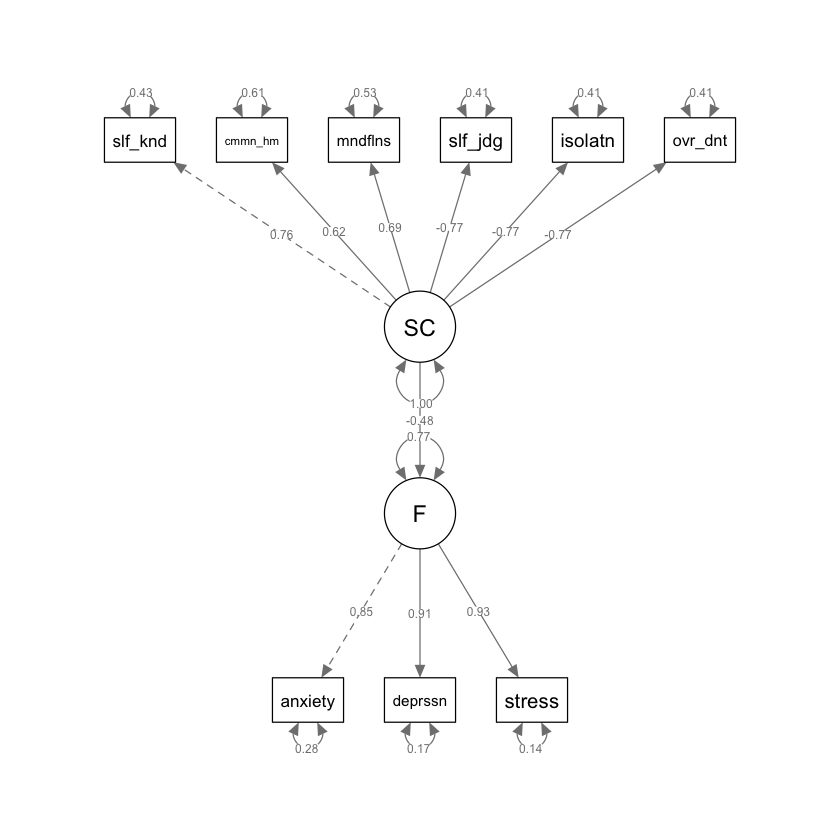

In [10]:
semPlot::semPaths(fit_sc,
    what = "col", whatLabels = "std", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

I coefficienti stimati nel modello SEM appaiono coerenti e in linea con le aspettative, in particolare il coefficiente che descrive l'effetto "causale" del fattore dell'autocompassione sul malessere psicologico, che si attesta a -0.48. Questo valore negativo corrobora l'ipotesi secondo cui l'autocompassione svolge un ruolo di fattore protettivo contro il malessere psicologico. Tuttavia, prima di confermare definitivamente questa conclusione, è cruciale esaminare gli indici di bontà di adattamento del modello. Questi indici ci permetteranno di valutare quanto accuratamente il modello SEM si adatta ai dati osservati, fornendo un quadro più chiaro della validità delle nostre inferenze. In altre parole, sebbene il modello suggerisca una relazione negativa tra autocompassione e malessere psicologico, la conferma finale di questa associazione dipenderà dall'adeguatezza complessiva del modello rispetto ai dati.

In [9]:
fitMeasures(fit_sc) |>
    print()

                 npar                  fmin                 chisq 
               19.000                 0.427               449.141 
                   df                pvalue        baseline.chisq 
               26.000                 0.000              3129.133 
          baseline.df       baseline.pvalue                   cfi 
               36.000                 0.000                 0.863 
                  tli                  nnfi                   rfi 
                0.811                 0.811                 0.801 
                  nfi                  pnfi                   ifi 
                0.856                 0.619                 0.864 
                  rni                  logl     unrestricted.logl 
                0.863            -12308.490            -12083.920 
                  aic                   bic                ntotal 
            24654.980             24736.021               526.000 
                 bic2                 rmsea        rmsea.ci.lo

L'analisi degli indici di bontà di adattamento rivela alcune preoccupazioni significative riguardo alla validità del nostro modello SEM. Il rapporto $\chi^2 / df$ emerge come eccessivamente elevato, segnalando una possibile mancanza di adattamento:

In [67]:
449.141 / 26

[1] 17.27465

Analogamente, i valori di CFI e TLI sono inferiori al livello desiderato, suggerendo che il modello non rappresenta adeguatamente la struttura dei dati. In aggiunta, gli indici RMSEA e SRMR superano le soglie accettabili, indicando ulteriormente un'inadeguata aderenza del modello ai dati.

Di fronte a questi risultati, è imprudente accettare la conclusione precedentemente formulata secondo cui l'autocompassione agisce come un fattore protettivo contro il malessere psicologico. Questa interpretazione, benché teoricamente fondata, non trova un solido supporto empirico nel contesto del modello attuale.

In questa situazione, un percorso costruttivo potrebbe essere quello di rivedere e potenzialmente modificare il modello. L'obiettivo sarebbe quello di esplorare alternative che potrebbero risultare in un migliore adattamento ai dati, mantenendo al contempo l'adeguatezza teorica. Ciò potrebbe includere la revisione delle assunzioni del modello, la riconsiderazione delle variabili incluse o la ristrutturazione delle relazioni ipotizzate tra di esse. Solo attraverso un modello che dimostra una bontà di adattamento adeguata possiamo affermare con maggiore sicurezza che i dati empirici sostengono l'ipotesi dell'effetto protettivo dell'autocompassione sul malessere psicologico.

## Potere Statistico e Precisione

Nell'ambito dei modelli di Structural Equation Modeling (SEM), l'analisi della potenza statistica è fondamentale per garantire l'affidabilità e la validità dei risultati. Esistono due approcci principali per quest'analisi: la potenza a priori (prospettica) e la potenza retrospettiva (post hoc, osservata).

1. **Potenza a priori (Prospettica):** Questa analisi viene effettuata prima della raccolta dei dati e mira a stimare la probabilità che uno studio identifichi un effetto significativo, se presente nella popolazione. È cruciale nella pianificazione della ricerca per determinare la dimensione del campione necessaria, aumentando così l'efficienza dello studio e prevenendo l'uso di campioni eccessivamente grandi o inadeguati. In SEM, la potenza a priori si stima specificando nel software le caratteristiche del modello di popolazione, ipotesi nulle e alternative, il livello di significatività statistica e la dimensione campionaria prevista.

2. **Potenza Retrospettiva (Post Hoc, Osservata):** A differenza dell'analisi a priori, questa viene condotta dopo la raccolta dei dati. Le statistiche campionarie vengono trattate come parametri reali della popolazione, ma questa pratica presenta limitazioni significative. Le stime possono essere distorte, e una maggiore potenza osservata non implica necessariamente una forte evidenza a favore delle ipotesi nulle non rifiutate. Inoltre, essendo una misura post hoc, non aiuta nella progettazione proattiva della ricerca.

Per l'analisi della potenza in SEM, sono stati sviluppati diversi metodi, tra cui:

1. Il metodo Satorra–Saris stima la potenza del test del rapporto di verosimiglianza per un singolo parametro.
2. Il metodo MacCallum–RMSEA si basa sulla RMSEA di popolazione e sulle distribuzioni chi-quadrato non centrali.
3. Il metodo di simulazione Monte Carlo è un'alternativa moderna e flessibile che non presuppone né risultati continui né stima ML predefinita.

Con l'avanzamento degli strumenti informatici, l'analisi della potenza statistica in SEM è diventata più accessibile:

**Software SEM con Simulazione Monte Carlo:** Software come Mplus e LISREL includono capacità di simulazione Monte Carlo, permettendo di generare dati campionari basati su ipotesi del modello e di valutare la frequenza con cui i risultati significativi vengono ottenuti.

**Metodo Kelley–Lai Precision:** Calcola la dimensione campionaria minima necessaria per stimare parametri come l'indice RMSEA entro un margine di errore specificato.

Nel contesto di `R`, le funzioni `semTools::findRMSEApower` e `semTools::findRMSEAsamplesize` del pacchetto `semTools` facilitano queste analisi:

1. `semTools::findRMSEApower`: Determina la potenza di un test SEM data una dimensione specifica del campione, basandosi sull'RMSEA e altri parametri del test.
   
2. `semTools::findRMSEAsamplesize`: Calcola la dimensione del campione necessaria per raggiungere una specifica potenza statistica in un test SEM, considerando l'RMSEA e altri criteri come il livello di significatività e la potenza desiderata.

Questi strumenti sono importanti per ottimizzare la progettazione della ricerca SEM, garantendo campioni adeguati e potenza statistica sufficiente per rilevare gli effetti di interesse.

## Commenti e considerazioni finali

Nella letteratura SEM sono state sollevate forti argomentazioni contro l'applicazione di RMSEA, CFI e TLI e i loro valori di cutoff convenzionali [si veda, ad esempio, {cite:t}`barrett2007structural`]. Tuttavia, prima che i ricercatori propongano e accettino alternative migliori, questi indici di bontà dell'adattamento continueranno ad essere applicati nella maggior parte degli studi SEM. {cite:t}`xia2019rmsea` fanno notare come, in base alla consuetudine corrente, valori RMSEA più grandi e valori CFI e TLI più piccoli indicano un adattamento peggiore. Ciò spinge i ricercatori a modificare i loro modelli per cercare di ottenere indici migliori. Tuttavia, la pratica attuale si è evoluta a tal punto da raggiungere la fase per cui gli indici di adattamento servono come *gli unici* criteri (in molte situazioni) per determinare se accettare o rifiutare un modello ipotizzato: se i valori degli indici di adattamento raggiungono la soglia "di pubblicabilità" (ad es. RMSEA < .06), allora non si ritiene più necessario migliorare il modello. In realtà, un'affermazione come la seguente non è sufficiente: "poiché i valori RMSEA, CFI e TLI suggeriscono un buon adattamento, questo modello è stato scelto come modello finale". Il raggiungimento di una serie di soglie desiderate di RMSEA, CFI e TLI è solo uno dei possibili indicatori che devono essere considerati nel processo di selezione di modelli. I ricercatori dovrebbero anche spiegare se esistono altre opzioni per migliorare il modello, perché tali opzioni sono o non sono adottate, e quali sono le conseguenze scientifiche e cliniche che derivano dalla scelta del modello in questione come quello finale.